# Audio Processing

Library imports.

Scipy is used to open a wav file as a numpy array.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import numpy as np

import scipy.io.wavfile

In [2]:
KNOCKING = "../AudioFiles/knocking.wav"
SPEECH = "../AudioFiles/speech.wav"

rate, data = scipy.io.wavfile.read(KNOCKING)

A quick check on the data on the audio file to check that it seems in order.

The rate shouldbe 48,000 samples per second and the audio file should be about 6 seconds long. Having checked, everything seems to be in order.

In [3]:
print(rate)
print(len(data))
print(len(data)/rate)

48000
306000
6.375


Below, I have just plotted a real time graph of the audio signal of a knocking sound on wood.

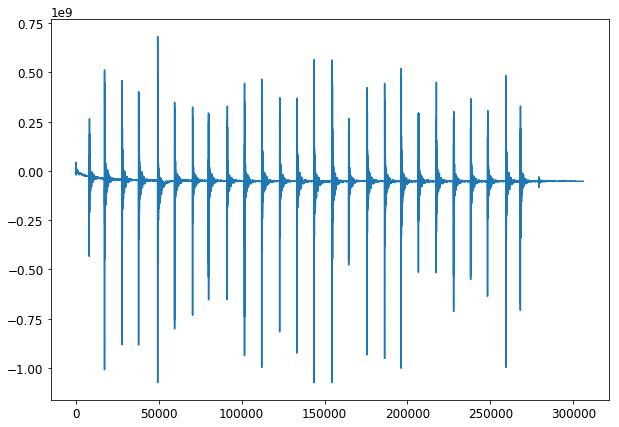

In [4]:
x = np.arange(0, len(data))
y = data

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.show()

And here, I apply a fft to the first 8192 samples of the audio file.

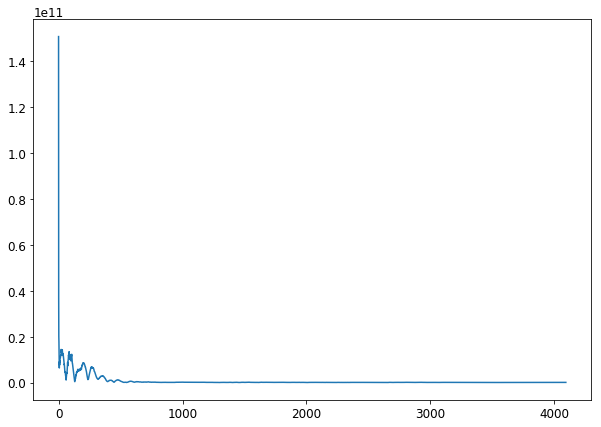

In [5]:
yFreq = np.fft.fft(data[:8191])

d = int(len(yFreq)/2)

plt.figure(figsize=(10,7))
plt.plot(abs(yFreq[:d - 1]))
plt.show()

Here I am doing the very same thing I was doing above but on the audio file of my voice. I again check to make sure the sample rate and length of the audio file looks to be normal

In [6]:
rate, data = scipy.io.wavfile.read(SPEECH)

print(rate)
print(len(data))
print(len(data)/rate)

48000
366000
7.625


And then a quick graphing of real time data of voice.

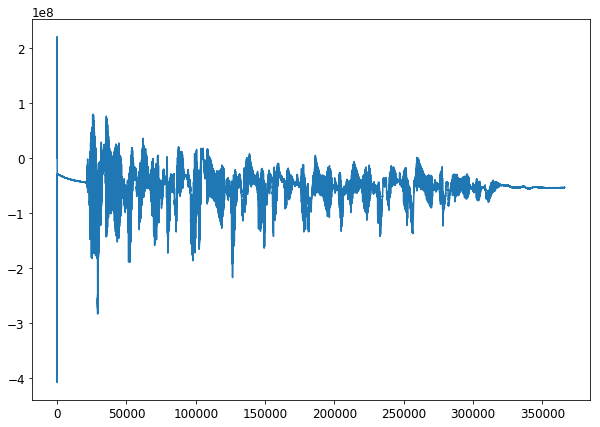

In [7]:
x = np.arange(0, len(data))
y = data

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.show()

Here, I can't quite just apply a fft to the voice file. There is something drowing out th erest of the audio data.

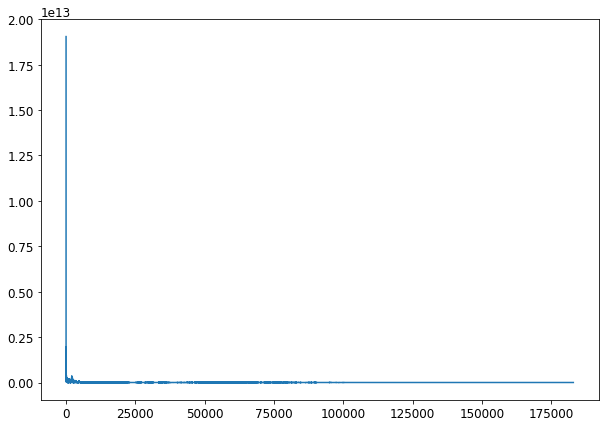

In [8]:
yFreq = np.fft.fft(data)

d = int(len(yFreq)/2)

plt.figure(figsize=(10,7))
plt.plot(abs(yFreq[:d - 1]))
plt.show()